# Submitted By : <font color = blue> RAJESH SUGURU </font>

# Ref : https://learn.upgrad.com/v/course/498/session/97931/segment/548601

# Assignment: <font color = blue> Tic-Tac-Toe </font>

## Problem Overview

One of the most popular and enduring games of all time is Tic-Tac-Toe. Because of its familiarity, this game is often used as a starting example to mathematically analyze a decision-making process. Its brevity makes it a perfect game to illustrate the rewards of thinking ahead and learning the consequence of each decision.

 

There are many variants of Tic-Tac-Toe. The most classic one is of X’s and O’s, where each player aims to place three of their marks in a horizontal, vertical, or diagonal row in a 3x3 grid.

 

***The other popular variant of this game is Numerical Tic-Tac-Toe. Instead of X’s and O’s, the numbers 1 to 9 are used. In the 3x3 grid, numbers 1 to 9 are filled, with one number in each cell. The first player plays with the odd numbers, the second player plays with the even numbers, i.e. player 1 can enter only an odd number in the cell while player 2 can enter an even number in one of the remaining cells. Each number can be used exactly once in the entire grid. The player who puts down 15 points in a line - (column, row or a diagonal) wins the game.*** 

## Goals

You are given two files: ‘TCGame_Env.py’ and ‘TicTacToe_Agent.ipynb’. The first one is the environment file and the second one is the agent file. You use the environment that is created in TCGame_Env.py to write the learning algorithm.

 

***You need to accomplish following in this assignment:***

> - ***Create an MDP for Numerical Tic-Tac-Toe game. The basic framework for this is:***
> - ***Initialise the state***
> - ***Define the action space for each state. (Be careful in defining actions. The actions are not the same for each state)***
> - ***Define the winning states: the sum of three numbers in a row, column or diagonal is 15***.
> - ***Define the terminal states (win,tie,loss)***
> - ***Build the reward structure as below:***
>> - ***+10 if the agent wins (makes 15 points first)***
>> - ***-10 if the environment wins***
>> - ***0 if the game ends in a draw (no one is able to make 15 and the board is filled up)***
>> - ***-1 for each move agent takes***
> - ***Define a step function which takes in an input of the agent’s action and state; and outputs the next state and reward. (Make sure you incorporate environment’s move in the next state).***
> - ***Build an agent that learns the game by Q-Learning. You can choose the hyperparameters (epsilon (decay rate), learning-rate, discount factor) of your choice. For that, you can train the model iteratively to obtain a good combination of hyperparameters. You won’t be evaluated on your choice of the hyperparameters. You need to submit only the final model.***
>> - ***While updating the Q-values, if the next state is a terminal state, then the Q-values from that state are 0. (No action is possible from that state)***
>> - ***For a 64-bit system with 8GB RAM, it takes ~30 minutes to run 5Mn episodes.***
> - ***Q-values convergence- check whether Q-values learnt by the agent have converged or not. Sample 4 state-action pairs and plot it with the number of episodes to understand the convergence.***

## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries

In [25]:
from TCGame_Env import TicTacToe
import collections
import numpy as np
import random
import pickle
import collections
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
## defining object for the Tictac toe environment created as MDP in TCGame_env
env = TicTacToe()

In [26]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [27]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]]
    return valid_Actions

In [28]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

In [29]:
# printing the default tic tac toe board positions
Q_state(env.state)

'x-x-x-x-x-x-x-x-x'

In [30]:
# Printing all the valid actions
valid_actions(env.state)


[(0, 1),
 (0, 3),
 (0, 5),
 (0, 7),
 (0, 9),
 (1, 1),
 (1, 3),
 (1, 5),
 (1, 7),
 (1, 9),
 (2, 1),
 (2, 3),
 (2, 5),
 (2, 7),
 (2, 9),
 (3, 1),
 (3, 3),
 (3, 5),
 (3, 7),
 (3, 9),
 (4, 1),
 (4, 3),
 (4, 5),
 (4, 7),
 (4, 9),
 (5, 1),
 (5, 3),
 (5, 5),
 (5, 7),
 (5, 9),
 (6, 1),
 (6, 3),
 (6, 5),
 (6, 7),
 (6, 9),
 (7, 1),
 (7, 3),
 (7, 5),
 (7, 7),
 (7, 9),
 (8, 1),
 (8, 3),
 (8, 5),
 (8, 7),
 (8, 9)]

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [31]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    # print(epsilon)
    z = np.random.random()
        
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        possible_action = [i for i in env.action_space(state)[0]]        
        action = possible_action[np.random.choice(range(len(possible_action)))]    #Exploration: randomly choosing and action
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [32]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [33]:
# Initialising states to be tracked
def initialise_tracking_states():
    Sample_Qvalues = [('x-x-x-x-x-x-x-x-x',(6,5)),('x-x-x-x-x-x-x-x-x',(1,9)),
                       ('x-3-x-x-1-x-x-x-x',(7,5)),('x-5-x-x-x-x-5-7-x',(8,2))]    #select some 4 Q-values
    for q_values in Sample_Qvalues:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []

In [34]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [35]:
# definign a function for saving states tracking

def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action]) 

#### Define hyperparameters  ---write your code here

In [36]:
### When tried for 500,000 espisodes it took 3635.70 seconds (Around 1Hr)
### In the interest of time of execution Episodes reduced to 100,000
#Defining parameters for the training

#EPISODES = 500000

#LR = 0.01                   # learning rate
#GAMMA = 0.9                # discount factor

#max_epsilon = 1.0
#min_epsilon = 0.001
#decay_rate = 0.001        # epsilon decay rate
#threshold = 5000       # no of episodes after which states_tracked wwill be saved
#policy_threshold = 300   # no of episodes after which Q dictionary/table will be saved
#win_lose_tie_threshold=10000 #Number of episodes before checking win, lose and tie

# <font color = blue> When tried with above Hyper parameters 
    - Number of Episodes: 500,000
    - Time Taken : 3635.70 seconds (Around 1Hr)
    - Policy_Q_dict.pkl is 69.7 MB </font>
    
## <font color = blue> For 500,000 Episodes with the Fequency of 10,000 episodes the Win-Lose-Ties are:</font> 
Episodes completed:    10000, Wins : 2850, Losses : 2653, Ties : 4497<br/>
Episodes completed:    20000, Wins : 5631, Losses : 5232, Ties : 9137<br/>
Episodes completed:    30000, Wins : 8216, Losses : 8029, Ties :13755<br/>
Episodes completed:    40000, Wins :10796, Losses :10819, Ties :18385<br/>
Episodes completed:    50000, Wins :13704, Losses :13379, Ties :22917<br/>
Episodes completed:    60000, Wins :16538, Losses :16029, Ties :27433<br/>
Episodes completed:    70000, Wins :19284, Losses :18765, Ties :31951<br/>
Episodes completed:    80000, Wins :22069, Losses :21455, Ties :36476<br/>
Episodes completed:    90000, Wins :24981, Losses :24122, Ties :40897<br/>
Episodes completed:   100000, Wins :27815, Losses :26722, Ties :45463<br/>
Episodes completed:   110000, Wins :30687, Losses :29416, Ties :49897<br/>
Episodes completed:   120000, Wins :33609, Losses :32074, Ties :54317<br/>
Episodes completed:   130000, Wins :36537, Losses :34660, Ties :58803<br/>
Episodes completed:   140000, Wins :39522, Losses :37264, Ties :63214<br/>
Episodes completed:   150000, Wins :42507, Losses :39850, Ties :67643<br/>
Episodes completed:   160000, Wins :45598, Losses :42383, Ties :72019<br/>
Episodes completed:   170000, Wins :48716, Losses :44991, Ties :76293<br/>
Episodes completed:   180000, Wins :51840, Losses :47455, Ties :80705<br/>
Episodes completed:   190000, Wins :54957, Losses :49990, Ties :85053<br/>
Episodes completed:   200000, Wins :58136, Losses :52475, Ties :89389<br/>
Episodes completed:   210000, Wins :61237, Losses :55029, Ties :93734<br/>
Episodes completed:   220000, Wins :64358, Losses :57564, Ties :98078<br/>
Episodes completed:   230000, Wins :67548, Losses :59982, Ties :102470<br/>
Episodes completed:   240000, Wins :70737, Losses :62462, Ties :106801<br/>
Episodes completed:   250000, Wins :73902, Losses :64911, Ties :111187<br/>
Episodes completed:   260000, Wins :77194, Losses :67411, Ties :115395<br/>
Episodes completed:   270000, Wins :80432, Losses :69897, Ties :119671<br/>
Episodes completed:   280000, Wins :83809, Losses :72237, Ties :123954<br/>
Episodes completed:   290000, Wins :87025, Losses :74728, Ties :128247<br/>
Episodes completed:   300000, Wins :90412, Losses :77141, Ties :132447<br/>
Episodes completed:   310000, Wins :93680, Losses :79540, Ties :136780<br/>
Episodes completed:   320000, Wins :97020, Losses :81987, Ties :140993<br/>
Episodes completed:   330000, Wins :100451, Losses :84348, Ties :145201<br/>
Episodes completed:   340000, Wins :103817, Losses :86676, Ties :149507<br/>
Episodes completed:   350000, Wins :107083, Losses :89156, Ties :153761<br/>
Episodes completed:   360000, Wins :110469, Losses :91673, Ties :157858<br/>
Episodes completed:   370000, Wins :113837, Losses :94113, Ties :162050<br/>
Episodes completed:   380000, Wins :117209, Losses :96563, Ties :166228<br/>
Episodes completed:   390000, Wins :120630, Losses :98980, Ties :170390<br/>
Episodes completed:   400000, Wins :123975, Losses :101450, Ties :174575<br/>
Episodes completed:   410000, Wins :127428, Losses :103832, Ties :178740<br/>
Episodes completed:   420000, Wins :130919, Losses :106176, Ties :182905<br/>
Episodes completed:   430000, Wins :134346, Losses :108573, Ties :187081<br/>
Episodes completed:   440000, Wins :137920, Losses :110899, Ties :191181<br/>
Episodes completed:   450000, Wins :141423, Losses :113325, Ties :195252<br/>
Episodes completed:   460000, Wins :144956, Losses :115743, Ties :199301<br/>
Episodes completed:   470000, Wins :148467, Losses :118152, Ties :203381<br/>
Episodes completed:   480000, Wins :152008, Losses :120558, Ties :207434<br/>
Episodes completed:   490000, Wins :155563, Losses :122914, Ties :211523<br/>
Episodes completed:   500000, Wins :158996, Losses :125379, Ties :215625<br/>

In [37]:
#Defining parameters for the training

EPISODES = 100000

LR = 0.01                   # learning rate
GAMMA = 0.9                # discount factor

max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.001        # epsilon decay rate
threshold = 200       # no of episodes after which states_tracked wwill be saved
policy_threshold = 300   # no of episodes after which Q dictionary/table will be saved
win_lose_tie_threshold=5000 #Number of episodes before checking win, lose and tie

In [38]:
initialise_tracking_states()

## Build an agent that learns the game by Q-Learning
### Q-update loop ---write your code here

In [39]:
import time 
start_time = time.time()
no_of_wins = 0
no_of_losses = 0
no_of_ties = 0

for episode in range(EPISODES):
    env = TicTacToe() # call the environment
    curr_state = env.state    
    done = False  
    add_to_dict(curr_state)  # adding the current state to dictionary

    while done != True:  
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)   # applying epsilon method
        next_state, reward, done = env.step(curr_state, curr_action) # getting reward
        next_state_temp = Q_state(next_state)
        add_to_dict(next_state)

        if reward == 10:
            no_of_wins += 1
        elif reward == 0:
            no_of_ties += 1
        elif reward == -10:
            no_of_losses += 1
        

        # Updating rules
        if done != True:
            max_next = max(Q_dict[next_state_temp],key=Q_dict[next_state_temp].get)  
                #this gets the action corresponding to max q-value of next state
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_temp][max_next])))
                                                      - Q_dict[curr_state1][curr_action] ) 
        else:
            Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))

        # navigating to next state
        curr_state = next_state
        
     #states tracking   
    if ((episode+1)%threshold)==0:
        save_tracking_states()
        save_obj(States_track,'States_tracking') #Saves States_tracking at evrey 200 episodes
# Upon reaching win_loss_tie threshold print win/tie/loss figures
    if ((episode+1)%win_lose_tie_threshold) == 0:  #every 5,000th episodes, print win/tie/loss figures 
        print('Episodes completed: %8d, Wins :%5d, Losses :%5d, Ties :%5d'% ((episode+1), no_of_wins, no_of_losses, no_of_ties))



    if ((episode+1)% policy_threshold) == 0:  #every 300th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy_Q_dict')  
        

elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracking')   
save_obj(Q_dict,'Policy_Q_dict')

Episodes completed:     5000, Wins : 1377, Losses : 1320, Ties : 2303
Episodes completed:    10000, Wins : 2781, Losses : 2594, Ties : 4625
Episodes completed:    15000, Wins : 4221, Losses : 3856, Ties : 6923
Episodes completed:    20000, Wins : 5593, Losses : 5183, Ties : 9224
Episodes completed:    25000, Wins : 6876, Losses : 6595, Ties :11529
Episodes completed:    30000, Wins : 8153, Losses : 8005, Ties :13842
Episodes completed:    35000, Wins : 9441, Losses : 9414, Ties :16145
Episodes completed:    40000, Wins :10776, Losses :10842, Ties :18382
Episodes completed:    45000, Wins :12149, Losses :12217, Ties :20634
Episodes completed:    50000, Wins :13615, Losses :13494, Ties :22891
Episodes completed:    55000, Wins :15096, Losses :14796, Ties :25108
Episodes completed:    60000, Wins :16431, Losses :16160, Ties :27409
Episodes completed:    65000, Wins :17837, Losses :17497, Ties :29666
Episodes completed:    70000, Wins :19174, Losses :18860, Ties :31966
Episodes completed: 

In [40]:
elapsed_time #Over all time took for execution is 265.11 seconds (4.41 mins)

265.11294960975647

In [41]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.0176236419567024,
              (0, 3): -1.01762405522892,
              (0, 5): -1.0176960591181599,
              (0, 7): -1.0176311771072595,
              (0, 9): -1.0176646406807106,
              (1, 1): -1.017707014429614,
              (1, 3): -1.0176242184002378,
              (1, 5): -1.0177055221105193,
              (1, 7): -1.0176245060867675,
              (1, 9): -1.0177109768972676,
              (2, 1): -1.0176221155825145,
              (2, 3): -1.0176769173217688,
              (2, 5): -1.0176520738784185,
              (2, 7): -1.0176235462317123,
              (2, 9): -1.017708597467491,
              (3, 1): -1.0176245674359896,
              (3, 3): -1.017623000124978,
              (3, 5): -1.0176230136010918,
              (3, 7): -1.0176486812977308,
              (3, 9): -1.0176229865585742,
              (4, 1): -1.0176356540579263,
              (4, 3): -1.0176828233068924,
              (4, 5)

In [42]:
len(Q_dict)

241460

### Checking whether Q-values learnt by the agent have converged or not
#### Check the states tracked for Q-values convergence
(non-evaluative)


<function matplotlib.pyplot.show(*args, **kw)>

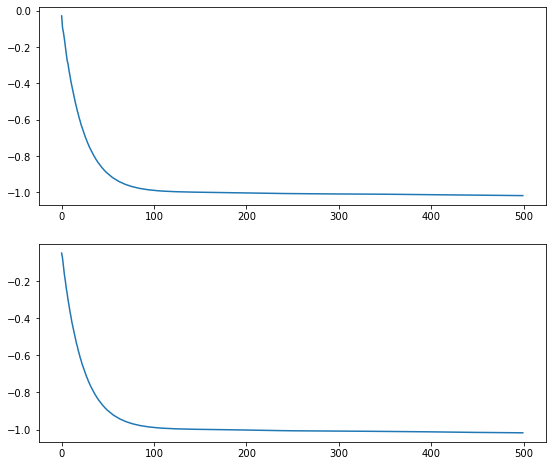

In [43]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
# Write the code for plotting the graphs for state-action pairs tracked

plt.figure(0, figsize=(20,8))


x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(6,5)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(6,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(1,9)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(1,9)]))
plt.show

### Epsilon - decay check

In [44]:
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

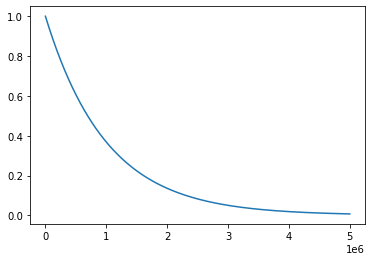

In [45]:
plt.plot(time, epsilon)
plt.show()

# <font color = grey> Great Job Agent ; Your Learning Skils are Too Good </font> 
# <font color = grey>Game Tic-Tac-Toe Ends Here and</font> <font color = blue>The Winner is Agent</font> 
